In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data_1D
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


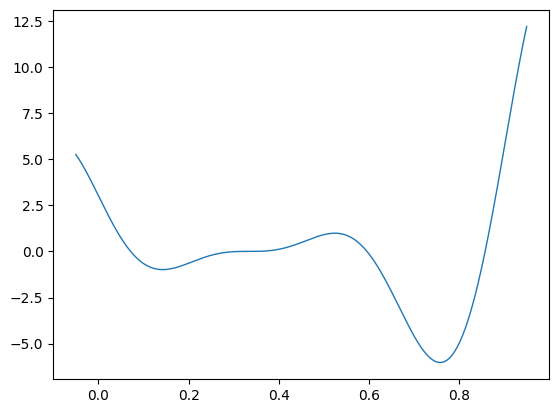

In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [ ]:
Forrester_Data.MPL()

In [ ]:
Forrester_Data.Random_Forest()

In [ ]:
Forrester_Data.GP()

In [ ]:
print(Forrester_Data.get_features())

In [ ]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Forrester_Data.get_GP(),
                   train_data           = X_train,
                   feature_names        = Forrester_Data.get_features(),
                   categorical_features = Forrester_Data.get_catagorical(),
                   mode                 = Forrester_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


In [ ]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4])
    print('data row ',data_row)
    
    #scores, acq_data = URM_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = URM_Exp.explain(X_init      = data_row.reshape(-1, 1),
                             Dimension   = 'One_For',
                             kernel_type = "Matern",
                             max_iter    = 20,
                             alpha       = "FUR_W",
                             #jitter=5,
                             interval    = 1,
                             normalize   = False)
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(-1, 1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = URM_Exp.get_exp_model())


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(f_predict)
print(e_predict)


In [ ]:
Forrester_Stats.Fidelity()

In [ ]:
#Forrester_Stats.Jaccard_Values()

In [ ]:
Forrester_Stats.Reg_Fidelity_Graph()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

#X, y = URM_Exp.get_surrogate_data()
#kernel = Matern()

#GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
#GP.fit(X, y)
        
#print(y[0])
#fe = GP.predict(X[0].reshape(1,-1))
#print(fe)
#ey = URM_Exp.gpmodel_predict(X[0].reshape(1,-1))
#print(ey)


In [ ]:
#acq_data.Create_BB_plot()

In [ ]:
acq_data.plot_point(0)

In [ ]:
acq_data.plot_t1_t2(0)

In [ ]:
acq_data.plot_point(1)

In [ ]:
acq_data.plot_t1_t2(1)

In [ ]:
acq_data.plot_point(2)

In [ ]:
acq_data.plot_point(3)

In [ ]:
acq_data.plot_point(4)

In [ ]:
acq_data.plot_t1_t2(4)

In [ ]:
acq_data.plot_point(5)

In [ ]:
acq_data.plot_point(6)

In [ ]:
acq_data.plot_t1_t2(6)

In [ ]:
acq_data.plot_point(7)

In [ ]:
acq_data.plot_point(8)

In [ ]:
acq_data.plot_point(9)

In [ ]:
acq_data.plot_point(10)

In [ ]:
acq_data.plot_point(11)

In [ ]:
acq_data.plot_point(12)

In [ ]:
acq_data.plot_point(13)

In [ ]:
acq_data.plot_point(14)

In [ ]:
acq_data.plot_point(15)

In [ ]:
acq_data.plot_point(16)

In [ ]:
acq_data.plot_point(17)

In [ ]:
acq_data.plot_point(18)

In [ ]:
acq_data.plot_point(19)

In [ ]:
acq_data.plot_all()